*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [90]:
# import some basic libraries
import os
import pandas as pd

os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features and adding them to the original dataset

In [91]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features

###### H1_data = to be done
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H3_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H3_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [92]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1


In [93]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1


In [94]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1


In [95]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1


In [96]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H3_data[['post_id', 'sentiment']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1,positive


### Checking, if the final combined dataframe looks fine

In [97]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,23,1,1,positive
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,...,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,41,3,1,positive
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,...,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,34,2,1,positive
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,...,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,618,1,1,neutral
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,...,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,20,2,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16768,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,...,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,22,1,0,positive
16769,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,...,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,9,1,1,neutral
16770,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,...,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,794,2,1,neutral
16771,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,...,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,69,1,1,positive


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [98]:
from pymer4.models import Lmer

In [99]:
# Define the formula for the multilevel regression model with varying slopes
formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + (1 + post_type|followers) + (1 + has_emoji|followers) + (1 + sentiment|followers)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: weighted_engagement~post_type+has_emoji+sentiment+(1+post_type|followers)+(1+has_emoji|followers)+(1+sentiment|followers)

Family: gaussian	 Inference: parametric

Number of observations: 16773	 Groups: {'followers': 53.0}

Log-likelihood: -162268.002 	 AIC: 324572.004

Random effects:

                          Name           Var       Std
followers          (Intercept)  4.432115e+05   665.741
followers            post_type  5.461116e+05   738.994
followers.1        (Intercept)  2.141210e+02    14.633
followers.1          has_emoji  1.960949e+05   442.826
followers.2        (Intercept)  4.676969e+05   683.884
followers.2   sentimentneutral  2.241322e+04   149.710
followers.2  sentimentpositive  1.793353e+05   423.480
Residual                        1.462847e+07  3824.719

                          IV1                IV2   Corr
followers         (Intercept)          post_type -1.000
fo

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),410.868,7.884,813.852,205.608,82.843,1.998,0.049,*
post_type,56.460,-182.414,295.334,121.877,58.330,0.463,0.645,
has_emoji,17.601,-179.533,214.736,100.581,52.148,0.175,0.862,
sentimentneutral,40.460,-241.046,321.966,143.628,1105.028,0.282,0.778,
sentimentpositive,51.310,-228.840,331.461,142.937,118.435,0.359,0.720,


In [100]:
# Extract fixed effects
fixed_effects = model.coefs

fixed_effects

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),410.867888,7.883672,813.852105,205.607970,82.843442,1.998307,0.048964,*
post_type,56.459880,-182.413922,295.333683,121.876629,58.330105,0.463254,0.644906,
has_emoji,17.601407,-179.532865,214.735680,100.580559,52.148188,0.174998,0.861759,
sentimentneutral,40.460207,-241.046048,321.966462,143.628280,1105.028069,0.281701,0.778226,
sentimentpositive,51.310186,-228.840293,331.460666,142.936544,118.434827,0.358972,0.720255,


In [101]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
model.fixef.head(5)

,(Intercept),post_type,has_emoji,sentimentneutral,sentimentpositive
66,861.867878,-110.414804,42.850926,-22.487056,20.168843
2300,568.139736,-1.732338,-10.022071,-3.769955,-118.548783
4000,537.250441,9.697022,13.034731,-2.097889,-110.590491
15000,690.596495,-47.042612,8.032704,-6.947911,-85.265002
17000,687.187798,-45.781358,15.401896,-6.582311,-78.374751


In [102]:
# Get population level coefficients
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),410.867888,7.883672,813.852105,205.607970,82.843442,1.998307,0.048964,*
post_type,56.459880,-182.413922,295.333683,121.876629,58.330105,0.463254,0.644906,
has_emoji,17.601407,-179.532865,214.735680,100.580559,52.148188,0.174998,0.861759,
sentimentneutral,40.460207,-241.046048,321.966462,143.628280,1105.028069,0.281701,0.778226,
sentimentpositive,51.310186,-228.840293,331.460666,142.936544,118.434827,0.358972,0.720255,


### Get group level deviates from population level coefficients (i.e. rfx)

In [103]:
# Extract random effects
random_effects = model.ranef

random_effects

,X.Intercept.,post_type,X.Intercept..1,has_emoji,X.Intercept..2,sentimentneutral,sentimentpositive
66,150.333330,-166.874684,0.561180,25.249519,-204.137997,-62.947263,-31.141343
2300,52.423949,-58.192219,-0.724855,-27.623479,-302.767672,-44.230162,-169.858970
4000,42.127518,-46.762858,-0.155999,-4.566676,-289.667026,-42.558096,-161.900678
15000,93.242869,-103.502492,-0.281783,-9.568704,-275.543877,-47.408118,-136.575188
17000,92.106637,-102.241239,-0.098993,-2.199511,-267.134152,-47.042518,-129.684937
22000,41.432984,-45.991905,-0.141326,-3.869255,-255.287597,-41.362286,-132.980830
23000,62.266615,-69.117885,-2.853152,-113.496442,-299.346417,-62.106274,-121.683322
26000,49.935587,-55.430059,-0.809569,-30.968079,-303.018883,-45.667503,-166.474175
29000,55.075823,-61.135881,0.282027,12.675734,-257.953712,-32.921684,-156.703861
35000,32.605159,-36.192743,-0.061498,-1.387070,-196.222865,-27.411326,-113.242003


<Axes: xlabel='Estimate'>

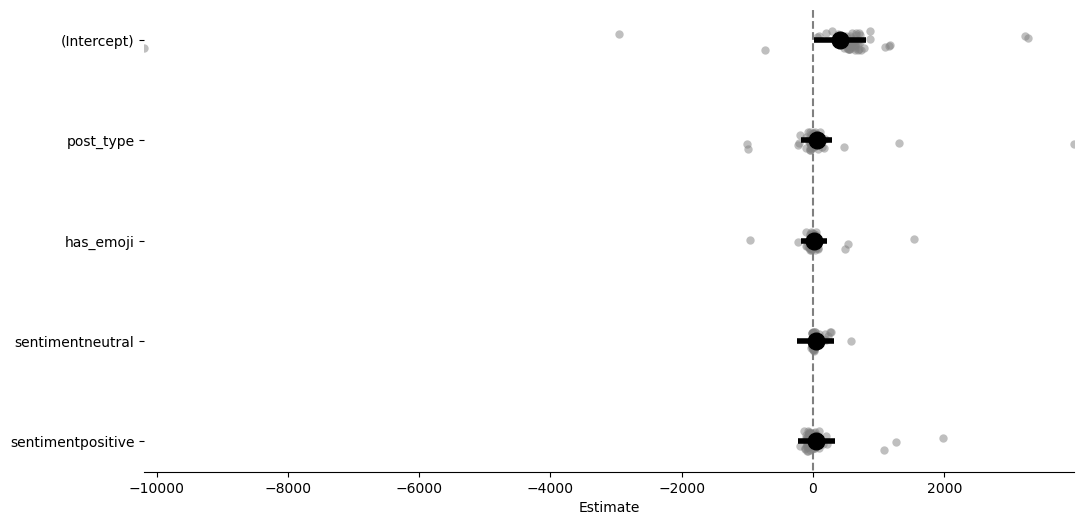

In [104]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

In [105]:
# Create a DataFrame to store the results
result_df = pd.DataFrame()

# Populate the DataFrame with fixed effects
result_df['Main effects Estimate'] = fixed_effects['Estimate'].values
result_df['SE'] = fixed_effects['SE'].values

# Populate the DataFrame with random effects
for group, effect in random_effects.items():
    result_df[f'Random effect {group}'] = effect

# Add Intercept row
result_df.loc['Intercept'] = [fixed_effects.loc['Intercept', 'Estimate'], fixed_effects.loc['Intercept', 'SE']] + [0] * (len(random_effects) - 1)

# Reorder columns
result_df = result_df[['Main effects Estimate', 'SE'] + [col for col in result_df.columns if col not in ['Main effects Estimate', 'SE']]]

# Print the results table
print(result_df)

KeyError: 'Intercept'

<Axes: xlabel='Estimate'>

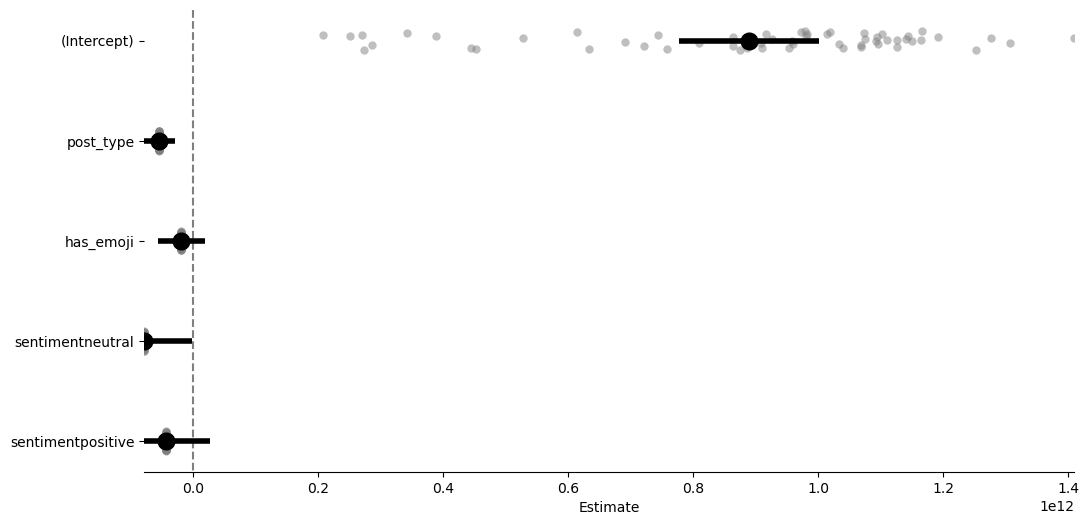

<Axes: xlabel='has_emoji', ylabel='predicted engagement'>

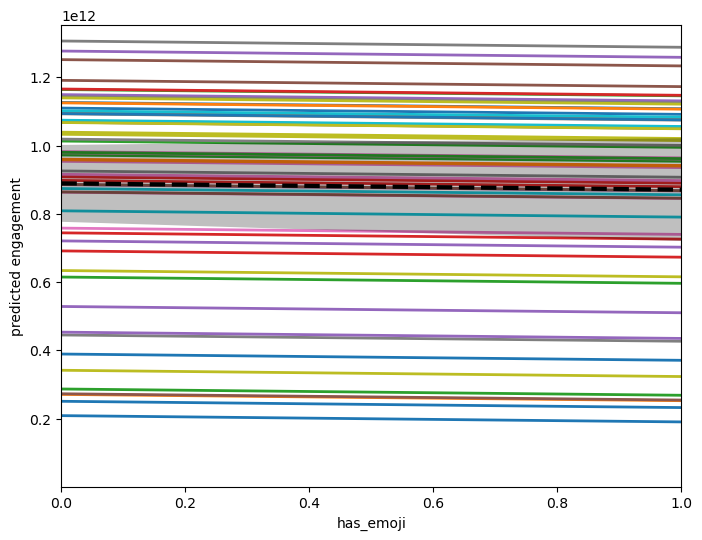

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

<Axes: xlabel='post_type', ylabel='predicted engagement'>

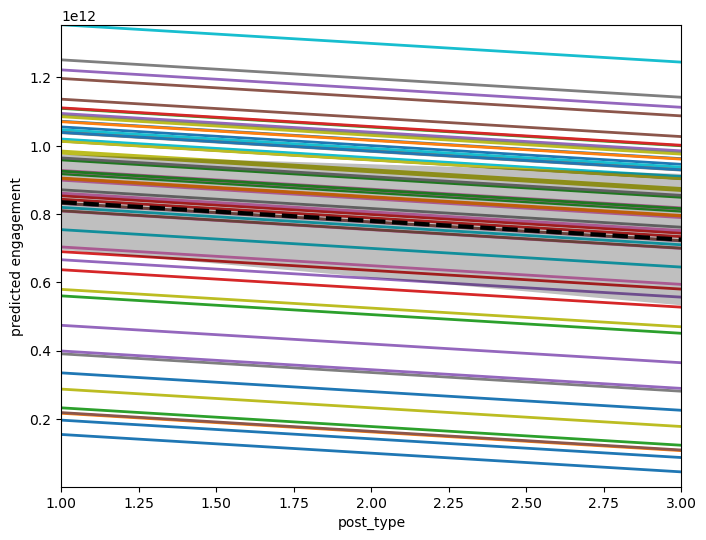

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

KeyError: 'sentiment'

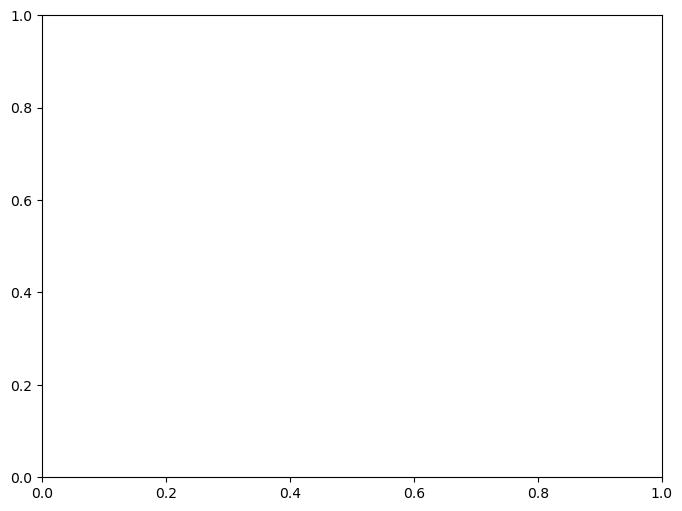

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("sentiment", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
